In [37]:
import sys, os

import numpy as np

from html.parser import HTMLParser
from tqdm import tqdm_notebook as tqdm

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

import yfinance as yf
from yahoofinancials import YahooFinancials

from humpack import tdict, Key_Table

from tabulate import tabulate

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import torch
from foundation import util

import selections as SEL
import organization as ORG

In [38]:
def run_tk(data=None, max_hist=3*365, itrs=100, interval=100, overlap=True, tk=None):

    if data is None:
        data = get_data(tk, max_hist)

    max_hist = len(data)

    s, e = ORG.sample_time(itrs, interval=interval, max_hist=max_hist, overlap=overlap)

    out = data[e] - data[s]
    return out

def get_data(tk, hist=3*365):
    tk = yf.Ticker(tk)
    data = tk.history(start=datetime.today() - timedelta(days=hist)).to_numpy()[:, 3]
    data /= data[0]
    data -= 1
    data *= 100
    return data

In [45]:
# full = {
#     'nations': SEL.nations,
#     'sectors': SEL.sectors,
#     'bonds': SEL.bonds,
#     'commodities': {v:k for k,v in SEL.commodities.items()},
#     'forex': {v:k for k,v in SEL.forex.items()},
# }
full = {
    'nations': {v:k for k,v in SEL.nations.items()},
    'sectors': {v:k for k,v in SEL.sectors.items()},
#     'bonds': {v:k for k,v in SEL.bonds.items()},
    'bonds': SEL.bonds,
    'commodities': SEL.commodities,
    'forex': SEL.forex,
}

In [46]:
# in months

yd = 365

start = yd*5
interval = 50
itrs = 1000

# start, end = ORG.get_start_end(start=start, interval=interval)
# start = ORG.get_startdate(start)
pass

In [154]:

cat = 'sectors'
cat = 'bonds'
cat = 'commodities'
cat = 'forex'
cat = 'nations'

cat = 'recommended'

# raw = full[cat]
raw = SEL.stox
raw = SEL.rec
# del raw['VTF']


raw = '''BABA	Alibaba
AMZN	Amazon
AAPL	Apple
GOOG	Google
NFLX	Netflix
FB	Facebook
TSLA	Tesla
AMD	AMD
BIDU	Baidu
IBM	IBM
INFY	Infosys
DTE.DE	Telekom
NVDA	nVidia
INTC	Intel
MSFT	Microsoft
NOK	Nokia
SAP.DE	SAP
PYPL	Paypal
ZM	Zoom
TWTR	Twitter
0700.HK	Tencent
COST	Costco
KHC	Kraft
MCD	McDonalds
KO	Coca-Cola
2222.SR	Saudi Oil
ADBE	Adobe
ADSK	Autodesk
BB	Blackberry
HPQ	HP
DBX	Dropbox
CTXS	Citrix
CSCO	Cisco
ORCL	Oracle
TMV.DE	TeamViewer
T	AT&T
SPOT	Spotify
SMSN.L	Samsung
PINS	Pinterest
VOD	Vodafone
WDC	Western Digital
XLNX	Xilinx
XRX	Xerox
YELP	Yelp
0386.HK	Sinopec
BP.L	BP
XOM	Exxon
TKA.DE	ThyssenKrupp Steel
MMM	3M
WEN	Wendy's
AMTD	Ameritrade
ALL	Allstate
CBK.DE	Commerzbank
DB	Deutsche Bank
HSBC	HSBC
FNF	Fidelity
ETFC	E-Trade
IBKR	Interactive Brokers
ING	ING Group
JPM	JPMorgan Chase
PRU	Prudential
MA	Mastercard
SCHW	Charles Schwab
Z	Zillow
WFC	Wells Fargo
V	Visa
USB	US Bank
BAYN.DE	Bayer
PFE	Pfizer
MRK	Merck
JNJ	Johnson & Johnson
BA	Boeing
GE	General Electric
HON	Honeywell
LMT	Lockheed Martin
RR.L	Rolls-Royce
NOC	Northrop Grumman
NTDOY	Nintendo
UPS	UPS
WM	Waste Management
9988.HK	Alibaba Holding
AIR.PA	Airbus
ALK	Alaska Airlines
BBY	Best Buy
BYND	Beyond Meat
EZJ.L	Easyjet
EXPE	Expedia
EBAY	eBay
DPW.DE	Deutsche Post
DIS	Disney
DAL	Delta Air Lines
CMG	Chipotle
GRUB	Grubhub
H	Hyatt
HD	Home Depot
LHA.DE	Lufthansa
ODP	Office Depot
NOKIA.HE	Nokia
LYFT	Lyft
RMG.L	Royal Mail
RYA.L	Ryanair
ROKU	ROKU
SBUX	Starbucks
SYY	Sysco
TMUS	T-Mobile
TSCO.L	Tesco
UBER	Uber
WMT	Wal-Mart
YUM	Yum Brands
WORK	Slack'''

bad = ['ZM', '2222.SR', 'DBX', 'TMV.DE', 'PINS', 'SPOT', '9988.HK', 'BYND', 'LYFT', 'UBER', 'WORK', 'ROKU']

raw = dict([line.split('\t') for line in raw.split('\n')])

for b in bad:
    del raw[b]


# tbl = ORG.get_table(raw.values(), pbar=tqdm)
# len(tbl)

In [155]:
tickers = list(raw.keys())
names = list(raw.values())
tickers

['BABA',
 'AMZN',
 'AAPL',
 'GOOG',
 'NFLX',
 'FB',
 'TSLA',
 'AMD',
 'BIDU',
 'IBM',
 'INFY',
 'DTE.DE',
 'NVDA',
 'INTC',
 'MSFT',
 'NOK',
 'SAP.DE',
 'PYPL',
 'TWTR',
 '0700.HK',
 'COST',
 'KHC',
 'MCD',
 'KO',
 'ADBE',
 'ADSK',
 'BB',
 'HPQ',
 'CTXS',
 'CSCO',
 'ORCL',
 'T',
 'SMSN.L',
 'VOD',
 'WDC',
 'XLNX',
 'XRX',
 'YELP',
 '0386.HK',
 'BP.L',
 'XOM',
 'TKA.DE',
 'MMM',
 'WEN',
 'AMTD',
 'ALL',
 'CBK.DE',
 'DB',
 'HSBC',
 'FNF',
 'ETFC',
 'IBKR',
 'ING',
 'JPM',
 'PRU',
 'MA',
 'SCHW',
 'Z',
 'WFC',
 'V',
 'USB',
 'BAYN.DE',
 'PFE',
 'MRK',
 'JNJ',
 'BA',
 'GE',
 'HON',
 'LMT',
 'RR.L',
 'NOC',
 'NTDOY',
 'UPS',
 'WM',
 'AIR.PA',
 'ALK',
 'BBY',
 'EZJ.L',
 'EXPE',
 'EBAY',
 'DPW.DE',
 'DIS',
 'DAL',
 'CMG',
 'GRUB',
 'H',
 'HD',
 'LHA.DE',
 'ODP',
 'NOKIA.HE',
 'RMG.L',
 'RYA.L',
 'SBUX',
 'SYY',
 'TMUS',
 'TSCO.L',
 'WMT',
 'YUM']

In [156]:
M = {}

In [157]:

for k in tqdm(tickers):
    if k not in M:
        try:
            M[k] = get_data(k, hist=start)
        except:
            print(k)
            break
# len(M)

C:\Users\anwan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [153]:

Y = np.array([run_tk(data=M[n], max_hist=start, 
                     itrs=itrs, interval=interval, overlap=True) 
              for n in tickers])

util.plot_distribs(torch.from_numpy(Y.T), figsize=(7,5))
lbls = [f'{n} ({t})' for n,t in zip(names, tickers)]
plt.xticks(np.arange(len(names)), lbls, rotation=90)
plt.title(cat)
plt.tight_layout()
pass

KeyError: 'PYPL'

In [90]:
plt.savefig(f'{cat}.png')

In [163]:
lns = {t:len(d) for t,d in M.items()}
lns
smallest = min(lns.values())
smallest

1234

In [159]:
intvs = [20, 40, 80, 160, 320]

In [214]:
headers = ['Tickers', 'Names'] + [str(n) for n in intvs]
cols = [tickers, names]

for iv in intvs:
    x = np.array([run_tk(data=M[n], max_hist=start, 
                         itrs=itrs, interval=iv, overlap=True) 
                  for n in tickers])
    mu, sigma = x.mean(1), x.std(1)
#     cols.append(mu)
    cols.append(['{:2.2f} +/- {:2.2f}'.format(m, s) for m,s in zip(mu,sigma)])

rows = list(zip(*cols))
rows = sorted(rows, key=lambda x: float(x[-4].split(' ')[0]))
print(tabulate(rows, headers=headers))

Tickers    Names                20                40                80                 160                320
---------  -------------------  ----------------  ----------------  -----------------  -----------------  -----------------
GE         General Electric     -0.80 +/- 6.42    -2.99 +/- 9.77    -3.96 +/- 12.65    -10.52 +/- 18.92   -23.24 +/- 27.84
DAL        Delta Air Lines      -0.72 +/- 12.70   -2.54 +/- 19.42   -2.46 +/- 23.90    -0.00 +/- 24.89    5.80 +/- 24.59
CBK.DE     Commerzbank          -1.29 +/- 7.80    -2.34 +/- 10.54   -4.22 +/- 15.22    -6.03 +/- 22.12    -7.08 +/- 33.99
ALK        Alaska Airlines      -1.04 +/- 10.68   -2.25 +/- 14.05   -3.65 +/- 18.33    -3.68 +/- 24.26    -6.79 +/- 23.97
TKA.DE     ThyssenKrupp Steel   -1.31 +/- 7.67    -2.12 +/- 10.63   -4.42 +/- 12.58    -5.64 +/- 18.20    -13.73 +/- 28.23
RR.L       Rolls-Royce          -0.99 +/- 9.46    -1.94 +/- 12.95   -3.39 +/- 18.84    -2.70 +/- 23.82    -0.99 +/- 32.52
WFC        Wells Fargo          -

In [193]:
S = np.array([run_tk(data=M[n], max_hist=start, 
                         itrs=10000, interval=320, overlap=True) 
                  for n in tickers])
S.shape

(98, 10000)

In [201]:
from scipy.special import softmax

In [194]:
A = S.copy()

In [210]:
# w = softmax(S.mean(1)/200)

In [211]:
V = A @ A.T
np.max(V)

5880566005.049979

In [212]:
vals, vecs = np.linalg.eig(V)
w = vecs[0]
w = np.abs(w)
w /= w.sum()

<IPython.core.display.Javascript object>


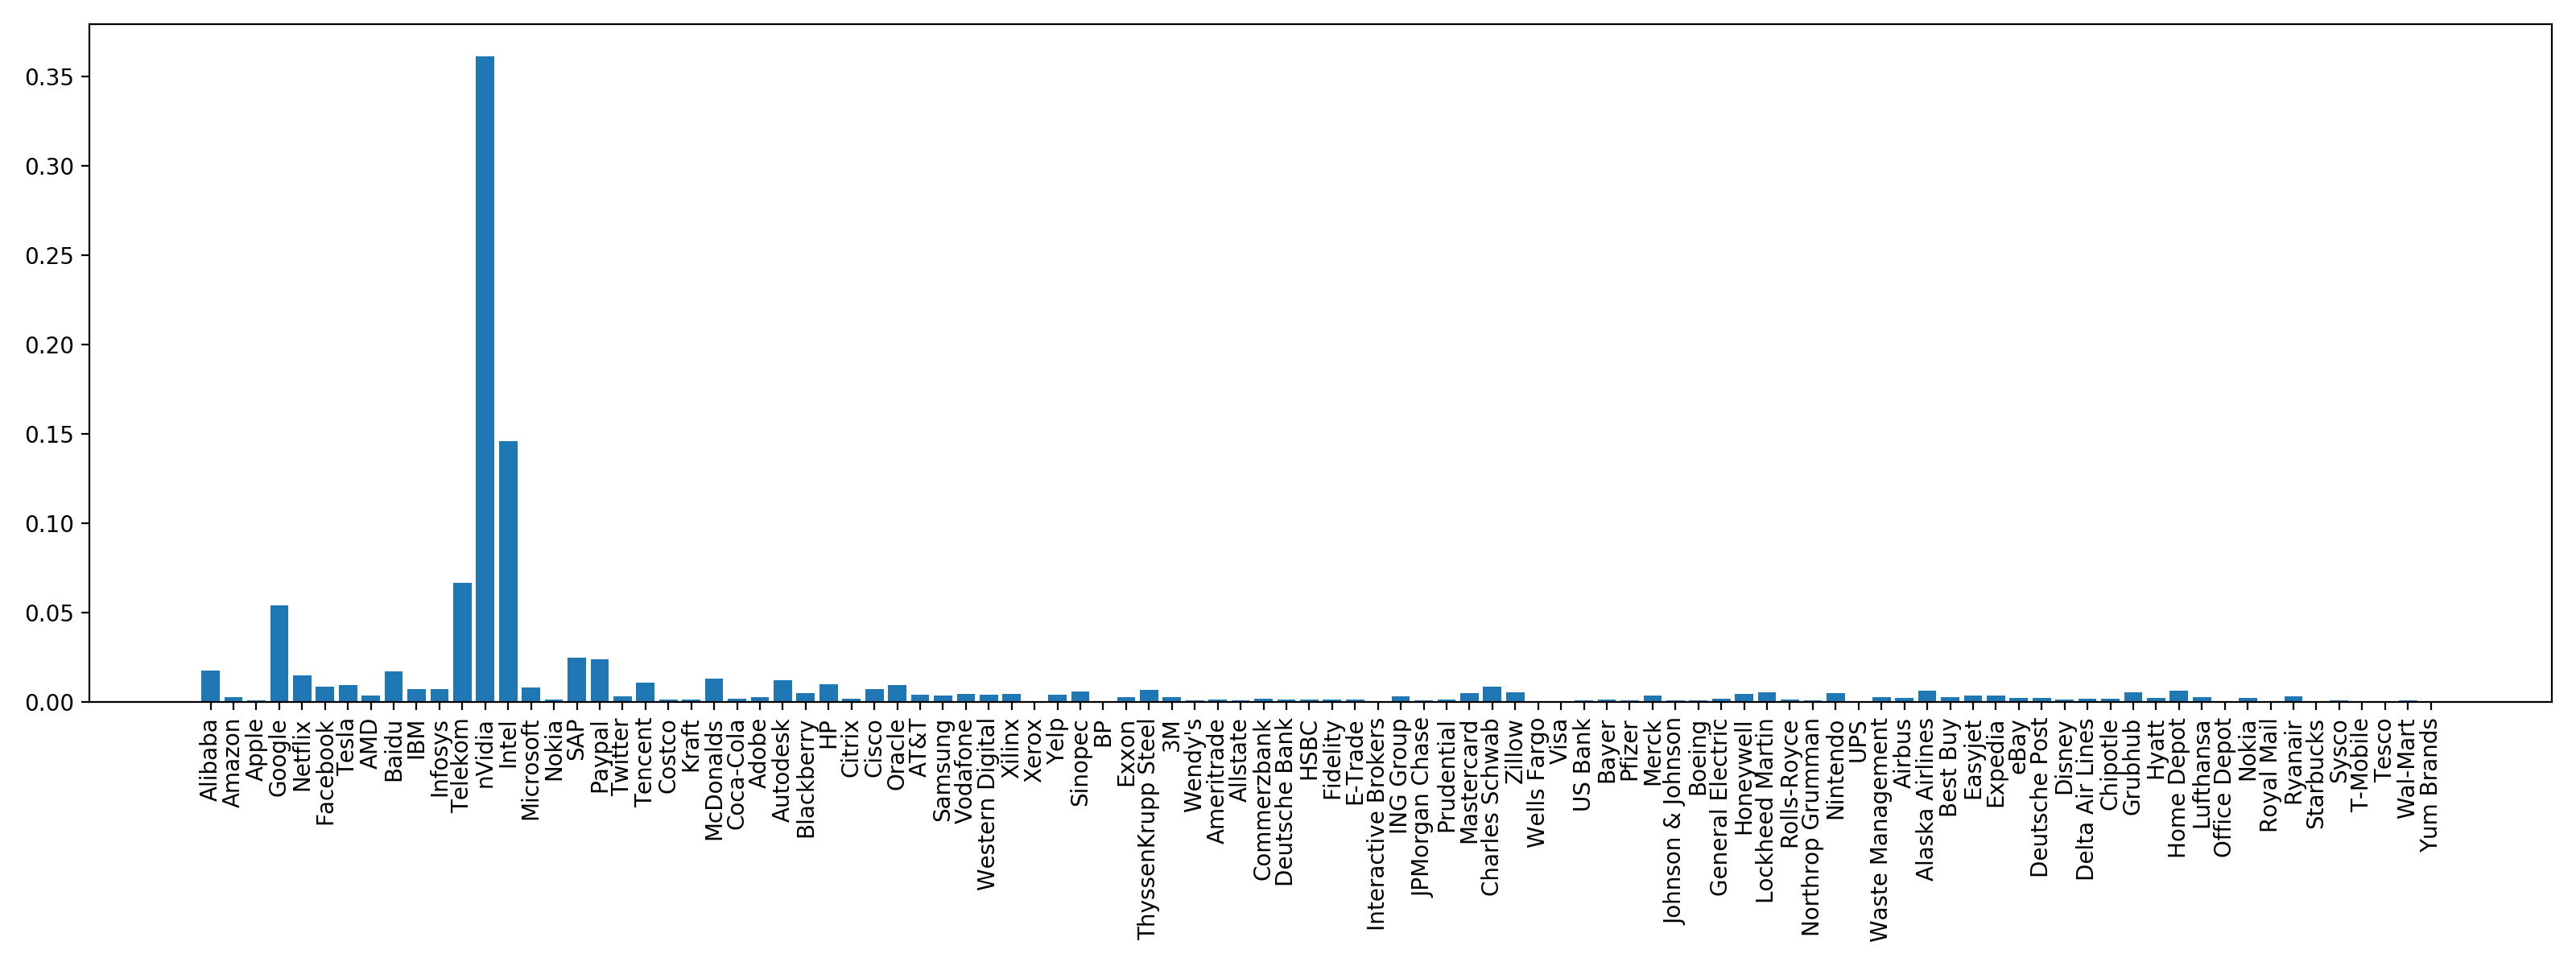

In [213]:
plt.figure(figsize=(16,6))
inds = np.arange(len(w))
plt.bar(inds, w)
plt.xticks(inds, names, rotation=90)
plt.tight_layout()
pass

In [215]:
yf.Ticker('FZROX').history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-11,10.54,10.54,10.54,10.54,0,0,0
2020-06-12,10.69,10.69,10.69,10.69,0,0,0
2020-06-15,10.80,10.80,10.80,10.80,0,0,0
2020-06-16,11.01,11.01,11.01,11.01,0,0,0
2020-06-17,10.96,10.96,10.96,10.96,0,0,0
2020-06-18,10.96,10.96,10.96,10.96,0,0,0
2020-06-19,10.91,10.91,10.91,10.91,0,0,0
2020-06-22,10.98,10.98,10.98,10.98,0,0,0
2020-06-23,11.02,11.02,11.02,11.02,0,0,0
